# 분류 (Classification)
- 입력 데이터를 미리 정의된 여러 클래스 중 하나로 예측하는 것 (범주형 데이터)
    - 이진 분류: 양성(1), 음성(0) 중에 하나를 맞추는 것
    - 다중 분류: 여러 클래스 중 하나를 맞추는 것

### Logistic Regression
- 선형 회귀 방식으로 분류 문제를 해결하는 모델
    - 이진 분류: 이진 분류를 위한 로지스틱 함수(시그모이드)를 통해 확률값을 계산하고 0 또는 1로 분류
    - 다중 분류: 다중 분류를 위한 소프트맥스 함수를 통해 각 클래스별 확률값을 계산해 다중 분류

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

##### 이진 분류를 위한 Sigmoid 함수
- 선형회귀식을 통해 도출한 예측값(z) 0과 1 사이의 수로 변환해주는 활성화 함수(Activation Function)

$
    시그모이드(z) = \frac{1}{1 + e^(-z)}
$

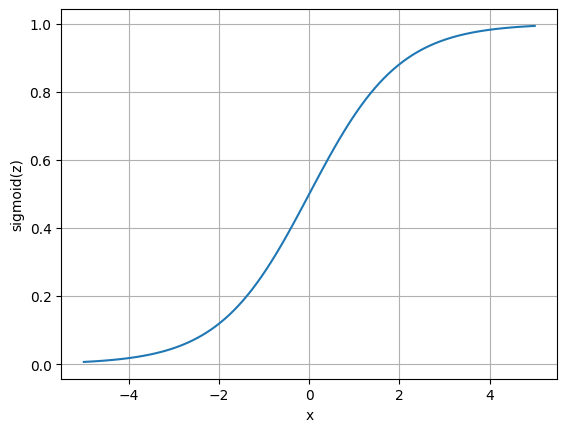

In [57]:
# 시그모이드 시각화
z = np.linspace(-5, 5, 100)     # 선형회귀 결과값
sigmoid_value = 1 / (1 + np.exp(-z))

plt.plot(z, sigmoid_value)
plt.xlabel('x')
plt.ylabel('sigmoid(z)')
plt.grid()
plt.show()

In [58]:
fish_df = pd.read_csv('./data/fish.csv')
# fish_df['Species'].value_counts()
is_bream_or_smelt = (fish_df['Species'] == 'Bream') | (fish_df['Species'] == 'Smelt')
fish_df = fish_df[is_bream_or_smelt]
fish_df

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
5,Bream,450.0,29.7,34.7,13.6024,4.9274
6,Bream,500.0,29.7,34.5,14.1795,5.2785
7,Bream,390.0,30.0,35.0,12.6700,4.6900
8,Bream,450.0,30.0,35.1,14.0049,4.8438
9,Bream,500.0,30.7,36.2,14.2266,4.9594


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = fish_df.drop('Species', axis=1)
y = fish_df['Species']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

scalar = StandardScaler()
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.transform(x_test)

In [60]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(x_train_scaled, y_train)

lr_clf.score(x_train_scaled, y_train), lr_clf.score(x_test_scaled, y_test)

(1.0, 1.0)

In [61]:
y_pred = lr_clf.predict(x_test_scaled[:3])
y_pred

print(lr_clf.classes_)
lr_clf.predict_proba(x_test_scaled[:3])

['Bream' 'Smelt']


array([[0.98159822, 0.01840178],
       [0.04990096, 0.95009904],
       [0.09298277, 0.90701723]])

In [62]:
lr_clf.coef_, lr_clf.intercept_
# w1x1 + w2x2 + w3x3 + w4x4 + w5x5 + b

(array([[-0.57717269, -0.79233938, -0.82533982, -0.86579233, -0.82205625]]),
 array([-2.38186126]))

In [63]:
# 선형회귀값 직접 계산
z1 = np.dot(x_test_scaled[:3], lr_clf.coef_[0]) + lr_clf.intercept_

# 선형회귀값 계산 함수 decision_function
z2 = lr_clf.decision_function(x_test_scaled[:3])

z1, z2

(array([-3.97673464,  2.94652601,  2.27774726]),
 array([-3.97673464,  2.94652601,  2.27774726]))

In [64]:
# 시그모이드 함수 적용
sigmoid_value = 1 / (1 + np.exp(-z1))
sigmoid_value

array([0.01840178, 0.95009904, 0.90701723])

In [65]:
# 최종 결과
['Smelt' if value >= 0.5 else 'Bream' for value in sigmoid_value]

['Bream', 'Smelt', 'Smelt']

##### 다중 분류를 위한 Softmax 함수
- 다중 클래스 분류를 위한 활성화 함수로 각 클래스에 대한 확률값 계산
- k 개의 클래스가 존재할 때 주어진 입력에 대해 다음과 같이 계산

$
    softmax(z_i) = \frac{e^{z_k}}{\sum_{j=1}^{K} e^{z_j}}
$

- $z_k$ : 각 클래스에 대한 점수 (입력값)
- $e^{z_k}$ : 해당 점수에 대한 지수 함수 적용
- $ sum_{j=1}^{K} e^{z_j}$ : 모든 클래스 점수에 대해 지수 함수 적용 후 종합

**다중 클래스 확률 계산 순서**
1. 샘플에 대해 회귀 결과 z 계산
2. 소프트맥스 함수 적용
    - z를 의 지수로 적용해 값을 확대 (클래스별 z의 차이를 극대화)
    - 합을 각 클래스의 값으로 나눠 비율을 계산하고 반환
3. 가장 높은 확률 값을 가진 클래스 선택

In [66]:
# 데이터셋 생성
from sklearn.datasets import make_classification

x, y = make_classification(    # 분류 문제 연습을 위한 가상 데이터셋 생성 함수
    n_samples=100,      # 샘플 개수
    n_features=4,       # 전체 특성 개수
    n_informative=3,    # 유의미한 특성 개수
    n_redundant=0,      # 중복 특성 개수
    n_classes=3,        # 클래스 수
    random_state=42,    # 랜덤 시드
)

df = pd.DataFrame(x, columns=['feat1', 'feat2', 'feat3', 'feat4'])
df['target'] = y
df

,feat1,feat2,feat3,feat4,target
0,1.437839,-1.151891,-0.808298,0.947384,1
1,-1.243953,-2.665636,-0.525755,-2.794481,2
2,-2.403298,2.788787,1.368632,0.520942,1
3,-0.572492,-0.395373,-0.576904,-1.502189,2
4,-0.785067,-2.013302,0.366598,0.779589,2
...,...,...,...,...,...
95,1.650580,-1.108798,-0.718444,-0.227124,0
96,-0.499463,0.453598,1.179440,-2.068572,2
97,0.456127,-0.262591,-0.827231,-3.515597,0
98,2.418974,-1.309900,0.012592,-0.052393,1


In [67]:
# 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)


In [70]:
lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(x_train, y_train)
lr_clf.score(x_train, y_train), lr_clf.score(x_test, y_test)

(0.7066666666666667, 0.44)

In [ ]:
y_pred = lr_clf.predict(x_test[:5])
y_pred

In [55]:
#
y_pred_proba = lr_clf.predict_proba(x_test[:5])
y_pred_proba, y_pred_proba.sum(axis=1)

(array([[0.22917118, 0.39960169, 0.37122713],
        [0.83550691, 0.16166581, 0.00282727],
        [0.573597  , 0.32484717, 0.10155583],
        [0.20188375, 0.64427073, 0.15384551],
        [0.02755811, 0.07287149, 0.8995704 ]]),
 array([1., 1., 1., 1., 1.]))

In [71]:
# 직접 계산
W = lr_clf.coef_
B = lr_clf.intercept_
W.shape, B.shape # ((3, 4) = (클래스 수, 특성 수), (3,) = (클래스 수))

((3, 4), (3,))

In [72]:
Z = lr_clf.decision_function(x_test[:5])
Z

array([[-0.34611464,  0.20988442,  0.13623022],
       [ 2.44374453,  0.80123723, -3.24498176],
       [ 0.76663021,  0.19805797, -0.96468818],
       [-0.29622795,  0.86419902, -0.56797107],
       [-1.48600708, -0.51360637,  1.99961345]])

In [80]:
# softmax 함수
def softmax(z):
    exp_z = np.exp(z)
    sum_exp_z = np.sum(exp_z, axis=1, keepdims=True)
    print(exp_z, sum_exp_z)
    return exp_z / sum_exp_z

y_pred_proba = softmax(Z)
y_pred_proba


[[ 0.70743138  1.23353548  1.14594568]
 [11.51608245  2.22829614  0.03896928]
 [ 2.15250054  1.21903306  0.38110202]
 [ 0.7436179   2.37310451  0.56667402]
 [ 0.22627435  0.59833387  7.38620038]] [[ 3.08691254]
 [13.78334787]
 [ 3.75263562]
 [ 3.68339642]
 [ 8.2108086 ]]


array([[0.22917118, 0.39960169, 0.37122713],
       [0.83550691, 0.16166581, 0.00282727],
       [0.573597  , 0.32484717, 0.10155583],
       [0.20188375, 0.64427073, 0.15384551],
       [0.02755811, 0.07287149, 0.8995704 ]])

In [79]:
# sum 함수 주의사항
n = np.array([[1, 2, 3], [4, 5, 6]])
exp_n = np.exp(n)
sum_exp_n = np.sum(exp_n, axis=1, keepdims=True)
print(exp_n)
print(sum_exp_n)
print(exp_n / sum_exp_n)

# array([[0.22917118, 0.39960169, 0.37122713],
#        [0.83550691, 0.16166581, 0.00282727],
#        [0.573597  , 0.32484717, 0.10155583],
#        [0.20188375, 0.64427073, 0.15384551],
#        [0.02755811, 0.07287149, 0.8995704 ]])

[[  2.71828183   7.3890561   20.08553692]
 [ 54.59815003 148.4131591  403.42879349]]
[[ 30.19287485]
 [606.44010263]]
[[0.09003057 0.24472847 0.66524096]
 [0.09003057 0.24472847 0.66524096]]


In [81]:
# scipy의 softmax 함수
import scipy
y_pred_proba = scipy.special.softmax(Z, axis=1)
y_pred_proba

array([[0.22917118, 0.39960169, 0.37122713],
       [0.83550691, 0.16166581, 0.00282727],
       [0.573597  , 0.32484717, 0.10155583],
       [0.20188375, 0.64427073, 0.15384551],
       [0.02755811, 0.07287149, 0.8995704 ]])

In [82]:
pred = np.argmax(y_pred_proba, axis=1)
pred

array([1, 0, 0, 1, 2])

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# 데이터 로드 ./data/fish.csv
fish_df = pd.read_csv('./data/fish.csv')

# 데이터 분리 및 정규화
x = fish_df.drop('Species', axis=1)
y = fish_df['Species']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

scalar  = StandardScaler()
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.transform(x_test)


In [85]:
# 모델 훈련 및 평가
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(x_train_scaled, y_train)
lr_clf.score(x_train_scaled, y_train), lr_clf.score(x_test_scaled, y_test)

y_pred = lr_clf.predict(x_test_scaled[:10])
print(lr_clf.classes_)
lr_clf.predict_proba(x_test_scaled[:10])

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


array([[4.09258166e-03, 9.14963240e-02, 5.44996127e-01, 8.08441468e-03,
        2.80496746e-01, 6.11374435e-02, 9.69636363e-03],
       [2.38768197e-04, 6.14759159e-02, 1.26503179e-01, 2.09669058e-03,
        8.69296309e-02, 7.21909373e-01, 8.46442652e-04],
       [9.31417295e-03, 8.97045866e-03, 2.23289703e-01, 5.69130702e-01,
        1.69678810e-01, 6.31583256e-03, 1.33003205e-02],
       [6.09086533e-02, 7.71114588e-02, 5.26503923e-01, 3.56050755e-02,
        2.56678732e-01, 2.96709654e-03, 4.02250605e-02],
       [4.20329168e-03, 2.95499860e-02, 6.63907569e-01, 2.59621240e-02,
        2.44584026e-01, 1.83957105e-02, 1.33972930e-02],
       [9.86630474e-01, 2.95968258e-03, 2.91880543e-03, 2.74318469e-04,
        3.90577665e-04, 9.16124031e-09, 6.82613250e-03],
       [8.41021997e-05, 3.81676606e-02, 1.06348684e-01, 9.40707911e-04,
        5.72541430e-02, 7.96746407e-01, 4.58295775e-04],
       [2.67188505e-02, 6.18793820e-02, 5.02256932e-01, 4.81443669e-02,
        3.24842532e-01, 7